In [6]:
import pandas as pd
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("coil_position_data.txt")
df.columns=['w_t','LV']
df.head()

,w_t,LV
0,0.001000,3.000000
1,2.170418,3.023155
2,3.183280,3.037627
3,4.340836,3.049204
4,6.221865,3.057887


In [8]:
w_t = smp.symbols('w_t', positive=True) # 
LV_spline = smp.interpolating_spline( 3 , w_t , df['w_t'] , df['LV'])

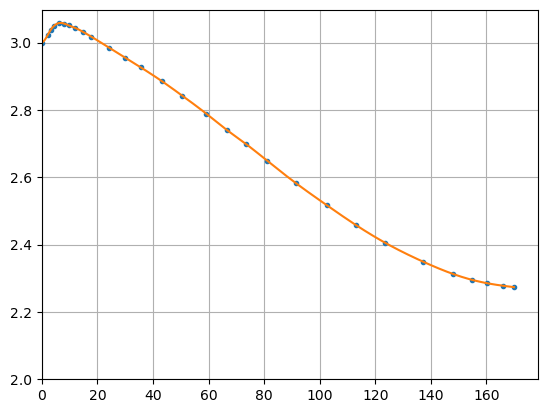

In [ ]:
plt.plot(df['w_t'],df['LV'],'.')

w_t_step = 0.1 #mm
w_t_vector = np.arange(0,max(df['w_t']),w_t_step)
LV_vector = smp.lambdify(w_t, LV_spline, "numpy")(w_t_vector)
plt.plot(w_t_vector,LV_vector)

plt.grid()
plt.ylim(bottom=2)
plt.xlim(left=0)
plt.show()

In [ ]:
def LV_func ( wheel_travel ):
    return LV_spline.subs( w_t , wheel_travel)

In [ ]:
from scipy.integrate import quad

inv_LV = smp.lambdify(w_t, 1/LV_spline, "numpy") 

def s_s_func ( wheel_travel ):
    # milimeters
    return quad( inv_LV , 0 , wheel_travel )[0]

In [ ]:
s_s_func(170)

65.00331397635739

In [ ]:
chainstay=440
wheel_base=1200
rear_split= 1 - chainstay/wheel_base

In [ ]:
#spring
k_spring = 70050.734 # N/m = 400 lbs/in

# Damper
LSC_force_zero_velocity = 0 # N
HSC_transition_velocity = 1 # m/s
HSC_transition_force = 
HSC_slope = 100 # N*s/m



In [ ]:
def F_spring_func ( wheel_travel ):
    #n Newtons
    return k_spring * s_s_func(wheel_travel)/1000

def F_w_spring_func ( wheel_travel ):
    # Newtons
    return F_spring_func(wheel_travel) / LV_func(wheel_travel)


def F_damper_func ( wheel_travel , wheel_velocity ):
    # Travel = milimeter , Velocity = meter/s
    shock_velocity = wheel_velocity / LV_func(wheel_travel)
    return damper_coef( shock_velocity )*shock_velocity

def F_w_damper_func ( wheel_travel , wheel_velocity ):
    # Newtons
    return F_damper_func( wheel_travel , wheel_velocity) / LV_func(wheel_travel)

In [ ]:
F_w_func(170)

2002.85749895292

In [ ]:
F_spring_func(170)

4553.529856476294